# Table of Contents
### 01: Import Libraries and Data
### 02: Data Cleaning
### 03: Data Prep for Regression Analysis
### 04: Regression Analysis

# 01. Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'/Users/Katherine/Desktop/House Sales'

In [3]:
#Import data
df = pd.read_csv(os.path.join(path, 'housing_data_clean.csv'), index_col = False)

# 02. Data Cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.head(10)

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
df.shape

(21608, 20)

In [8]:
# Check for missing values
df.isnull().sum()

Unnamed: 0       0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

no missing values

In [9]:
#check for duplicates
dups = df.duplicated()

In [10]:
dups.shape

(21608,)

no duplicates

/var/folders/2j/0xd585v503s3fpmff606pdkw0000gn/T/ipykernel_22032/1720721510.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=25)


<Axes: xlabel='price', ylabel='Density'>

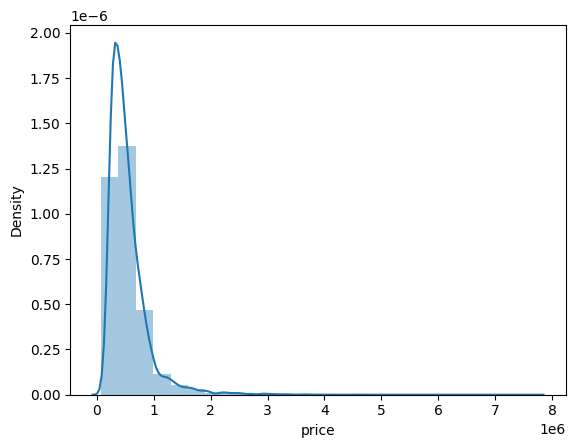

In [11]:
#check for extreme values
sns.distplot(df['price'], bins=25)

In [12]:
#check for mean price
df['price'].mean()

540098.3690299889

In [13]:
#check for median price
df['price'].median()

450000.0

In [14]:
#check for max price
df['price'].max()

7700000.0

# 03. Data Prep for Regression Analysis

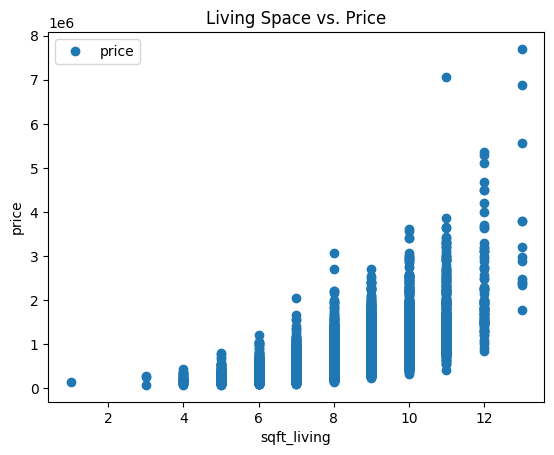

In [42]:
# Create a scatterplot

df.plot(x = 'grade', y='price',style='o')
plt.title('Living Space vs. Price')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

Hypothesis: The higher the living room square footage of the house, the higher the price.

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [35]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [36]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [37]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Regression Analysis

In [38]:
#create a regression object
regression = LinearRegression()

In [39]:
#fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [40]:
#predict the values of y using X
y_predicted = regression.predict(X_test)

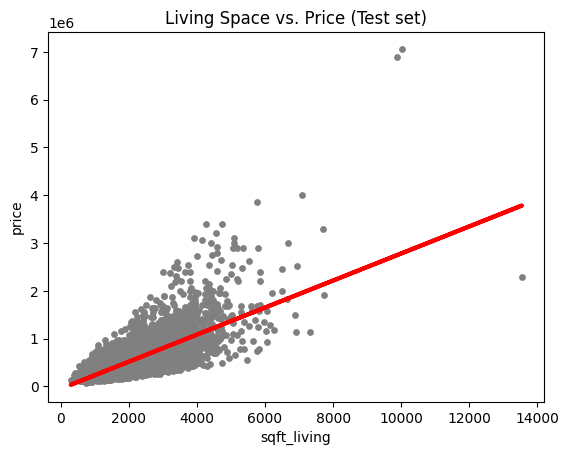

In [41]:
#create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Living Space vs. Price (Test set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

In [43]:
#create the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [44]:
#print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[282.82152005]]
Mean squared error:  68887192205.58864
R2 score:  0.48716554046649996


In [45]:
y_predicted

array([[282718.71253192],
       [607963.46059258],
       [681497.05580629],
       ...,
       [344939.44694353],
       [865331.04384057],
       [316657.29493825]])

In [46]:
#create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,216500.0,2.827187e+05
1,451000.0,6.079635e+05
2,673000.0,6.814971e+05
3,650000.0,3.703934e+05
4,1061600.0,7.974539e+05
5,1225000.0,9.190671e+05
6,500000.0,3.251419e+05
7,453000.0,4.665527e+05
8,379950.0,5.089759e+05
9,468500.0,3.336266e+05


In [47]:
#compare how the regression fits the training test
y_predicted_train = regression.predict(X_train)

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[282.82152005]]
Mean squared error:  68147213869.47555
R2 score:  0.4952243941792802


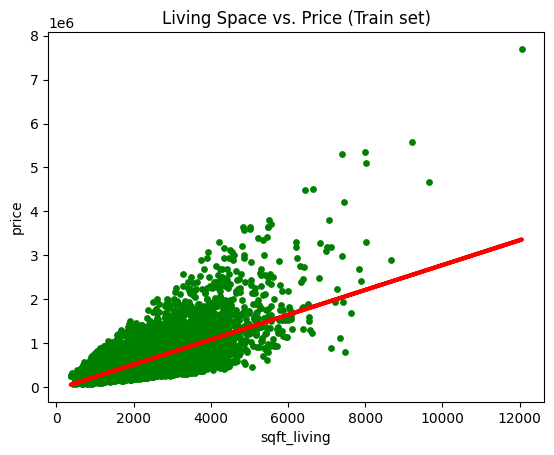

In [50]:
#visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Living Space vs. Price (Train set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

While a bigger living space does have some impact on the price of a home, there is not a strong enough correlation to accurately represent the full data set. There are still homes with larger living spaces that are priced lower. With the data set as large as it is, I am not aware of any current bias that could be in this analysis.